# Machine Learning Major Project

In this project I use PCA to show that unfortunately biologically realistic data and models are still seperable.

Rationale I use python with dask and numba to save time, although Julia perhaps better long term solution, although I use that elsewhere.

If biologically realistic models where a better imitation of real experimental cells, then data and models would not be seperable, by plotting onto a high dimensional feature space we show that data and models are seperable.

We then use random forest regression to find out which dimensions explain the most variance.

In [1]:
import os
import dask.dataframe as dd    
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd
os.getcwd()

'/Users/rjjarvis/Dropbox (ASU)/just_data_frames'

In [2]:
#help(df)

with open('dm_on_models.p','rb') as f:
    (RAW_dtc,ADEXP_dtc) = pickle.load(f)
# Impute remaining missing values with 0.
#

/Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/optimization_management.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib

consider installing pynn a heavier backend


In [3]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [4]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

In [5]:
standard = 0
strong = 0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]



# Load and clean data in one cell

In [36]:
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)

    # A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df = df.fillna(0).applymap(f)
#df_30x = df_30x.fillna(0).applymap(f)
df.head()

df
df_dask = dd.from_pandas(df.T, npartitions=8)#, chunksize=8)    
#df_30x = df_30x.fillna(0).applymap(f)

#for i in df.columns:
#    print(i)
    
#dir(df_dask)#.persist()#.compute()


CPU times: user 42 s, sys: 807 ms, total: 42.8 s
Wall time: 43.9 s
CPU times: user 5.34 s, sys: 126 ms, total: 5.47 s
Wall time: 5.63 s


AttributeError: 'DataFrame' object has no attribute '_repr_data'

AttributeError: 'DataFrame' object has no attribute '_repr_data'

In [ ]:
% time df_dask = df_dask.fillna(0).applymap(f)

In [7]:
dm_labels = [list(keys.keys())[0] for keys in easy_map ]
keep_columns = []
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns:
            keep_columns.append(str(k)+str('_3.0x'))
        elif str(k)+str('_1.5x') in df.columns:
            keep_columns.append(str(k)+str('_1.5x'))

df1 = pd.DataFrame(df,columns=keep_columns)
df = df1
df.head()

,AP12AmplitudeDropTest_3.0x,AP1SSAmplitudeChangeTest_3.0x,AP1AmplitudeTest_3.0x,AP1WidthHalfHeightTest_3.0x,AP1WidthPeakToTroughTest_3.0x,AP1RateOfChangePeakToTroughTest_3.0x,AP1AHPDepthTest_3.0x,AP2AmplitudeTest_3.0x,AP2WidthHalfHeightTest_3.0x,AP2WidthPeakToTroughTest_3.0x,...,ISICVTest_3.0x,ISIMedianTest_3.0x,ISIBurstMeanChangeTest_3.0x,SpikeRateStrongStimTest_3.0x,AP1DelayMeanStrongStimTest_3.0x,AP1DelaySDStrongStimTest_3.0x,AP2DelayMeanStrongStimTest_3.0x,AP2DelaySDStrongStimTest_3.0x,Burst1ISIMeanStrongStimTest_3.0x,Burst1ISISDStrongStimTest_3.0x
313861539,0.009156,0.005390,0.037937,0.120,0.460,-0.182133,0.045844,0.028781,0.155,0.56,...,0.311657,10.235,-98.819898,47.0,22.710,0.0,607.405,1.136868e-13,295.7975,5.684342e-14
313861677,0.001219,0.000000,0.064875,0.685,10.035,-0.009834,0.033813,0.063656,0.785,0.00,...,2.516959,66.200,15.416833,3.0,53.410,0.0,103.550,0.000000e+00,54.0050,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,58.906250,33.244049,58.906250,0.200,0.000,0.000000,0.000000,0.000000,0.000,1.55,...,0.000000,0.000,0.000000,52.0,30.980,0.0,44.965,0.000000e+00,14.4050,0.000000e+00


In [8]:
df.shape

(7285, 38)

In [9]:
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_1.5x') in df.columns:
            df.rename(columns={str(k)+str('_1.5x'):str(k)}, inplace=True)

for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns: 
            df.rename(columns={str(k)+str('_3.0x'):str(k)}, inplace=True)


for k in RAW_dtc.keys():
    temp0 = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    sub_df = df[temp0.columns]
    break
    

cnt=0
for k in RAW_dtc.keys():
    temp0 = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    temp0.rename(index={0:str(k)+str(' fe_izhi')},inplace=True)
    temp1 = pd.DataFrame(ADEXP_dtc[k][0].dm_test_features)
    temp1.rename(index={0:str(k)+str(' adexp')},inplace=True)
    #display(temp1)
    #sub_df = sub_df.append(temp0)
    #sub_df = sub_df.append(temp1)
    
    sub_df = pd.concat([temp0, sub_df])#, ignore_index=True)
    sub_df = pd.concat([temp1, sub_df])#, ignore_index=True)

    cnt+=1

df = sub_df

In [10]:
sub_df.head()
size=cnt*2
print(size)
#RAW_dtc.keys()

10


In [11]:
#df = df[any(keep_columns) in df]
df



,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
Hippocampus CA1 basket cell adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.000,...,4.000,0.000000e+00,269.5,3.000,0.0,5.000,0.000000e+00,2.0000,0.000000e+00,3.071024e-05
Hippocampus CA1 basket cell fe_izhi,0.000011,0.000017,0.069998,0.705,36.945,-0.002727,0.030769,0.069986,0.710,24.320,...,95.575,-4.753126e+00,34.5,10.920,0.0,20.260,0.000000e+00,11.7875,0.000000e+00,2.416693e-02
Neocortex pyramidal cell layer 5-6 adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.000,...,4.000,0.000000e+00,269.5,3.000,0.0,5.000,0.000000e+00,2.0000,0.000000e+00,3.071024e-05
Neocortex pyramidal cell layer 5-6 fe_izhi,-0.000014,-0.000051,0.069881,0.280,12.500,-0.009758,0.052092,0.069895,0.280,12.330,...,85.600,1.349831e+00,33.5,9.465,0.0,21.935,0.000000e+00,22.8625,0.000000e+00,6.107706e-02
Hippocampus CA1 pyramidal cell adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.000,...,4.000,0.000000e+00,269.5,3.000,0.0,5.000,0.000000e+00,2.0000,0.000000e+00,3.071024e-05
Hippocampus CA1 pyramidal cell fe_izhi,-0.000014,-0.000051,0.069881,0.280,12.500,-0.009758,0.052092,0.069895,0.280,12.330,...,85.600,1.349831e+00,33.5,9.465,0.0,21.935,0.000000e+00,22.8625,0.000000e+00,6.107706e-02
Olfactory bulb (main) mitral cell adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.000,...,4.000,-7.579123e-12,269.5,3.000,0.0,5.000,0.000000e+00,2.0000,0.000000e+00,7.558388e-05
Olfactory bulb (main) mitral cell fe_izhi,-0.000019,-0.000017,0.069970,1.230,9.490,-0.011650,0.040589,0.069989,1.280,14.745,...,81.190,1.885270e+01,43.0,9.450,0.0,21.825,0.000000e+00,14.2475,0.000000e+00,2.548990e-02
Cerebellum Purkinje cell adexp,0.000000,NaN,NaN,NaN,0.000,-54.625000,0.054625,NaN,NaN,0.000,...,2.000,0.000000e+00,275.0,2.000,0.0,4.000,0.000000e+00,2.0000,0.000000e+00,3.071018e-05
Cerebellum Purkinje cell fe_izhi,NaN,NaN,0.044963,0.370,0.000,-17000.000000,0.040037,NaN,NaN,NaN,...,NaN,NaN,10.0,13.845,0.0,49.020,0.000000e+00,63.0625,0.000000e+00,5.021916e-02


In [12]:
#import dask.dataframe as dd

df.iloc[0][192:195]


if 'InputResistanceTest_1.5x' in df.columns:
    # in order to find out what is seperating and what is not.
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']
    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
    del df['AHP_depth_abs_1.5x']



In [13]:
df.tail()

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
NMLCL001594,5.680001,2.950002,91.974881,0.73,5.12,-21.791169,19.595903,86.294880,0.78,5.83,...,21.90,1.952036,90.0,3.20,0.0,14.17,0.0,9.915,0.0,71.106876
NMLCL001650,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0,64.812843
NMLCL001657,0.053719,0.031047,60.009550,5.83,16.54,-5.688753,34.082421,59.955830,5.84,17.05,...,219.30,0.091283,9.5,66.31,0.0,169.57,0.0,104.225,0.0,38.619367
NMLCL001660,0.039358,-0.776942,9.128643,0.32,0.01,-10587.879650,96.750154,9.089285,0.32,25.84,...,164.77,39.802715,17.5,59.35,0.0,103.71,0.0,46.795,0.0,21.387796
NMLCL001663,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0,64.812843


In [14]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

In [15]:
print("There are %d models+data and %d features" % df.shape)
#print("There are %d models+data and %d features" % dask_frame.shape)

There are 7295 models+data and 38 features


# The data frame is big.
*lets experiment with dask -lazy pandas array to avoid storing it all in memory, and to do CPU-block-mapped operations in partitions 

In [35]:
%%capture
# Impute remaining missing values with 0.

dask_frame = dd.from_pandas(df.T,npartitions=8)
%time dask_frame.size
%time dask_frame.drop_duplicates

<bound method _Frame.drop_duplicates of Dask DataFrame Structure:
Cell_ID                       Hippocampus CA1 basket cell adexp Hippocampus CA1 basket cell fe_izhi Neocortex pyramidal cell layer 5-6 fe_izhi Olfactory bulb (main) mitral cell adexp Olfactory bulb (main) mitral cell fe_izhi Cerebellum Purkinje cell adexp Cerebellum Purkinje cell fe_izhi NMLCL000073 NMLCL000087 NMLCL000089 NMLCL000090 NMLCL000091 NMLCL000093 NMLCL000095 NMLCL000096 NMLCL000097 NMLCL000098 NMLCL000099 NMLCL000100 NMLCL000101 NMLCL000102 NMLCL000103 NMLCL000104 NMLCL000105 NMLCL000106 NMLCL000107 NMLCL000108 NMLCL000109 NMLCL000110 NMLCL000111 NMLCL000112 NMLCL000113 NMLCL000115 NMLCL000116 NMLCL000117 NMLCL000118 NMLCL000119 NMLCL000120 NMLCL000121 NMLCL000122 NMLCL000123 NMLCL000124 NMLCL000125 NMLCL000126 NMLCL000127 NMLCL000128 NMLCL000129 NMLCL000130 NMLCL000131 NMLCL000132 NMLCL000133 NMLCL000134 NMLCL000136 NMLCL000138 NMLCL000139 NMLCL000140 NMLCL000141 NMLCL000142 NMLCL000144 NMLCL000146 NMLCL0001

In [37]:
%time df.size
%time df.drop_duplicates

CPU times: user 145 µs, sys: 1e+03 ns, total: 146 µs
Wall time: 156 µs
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.8 µs


<bound method DataFrame.drop_duplicates of              AHP1_depth_from_peak_1.5x  AHP2_depth_from_peak_1.5x  \
313861539                    81.937500                  78.406255   
313861677                    97.718750                  98.093750   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.343754   
313862167                    59.406250                  57.3

In [38]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)
print(len(df))

1667


In [39]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)
print(len(df))



1667


In [40]:
#df.index[0:50]

In [41]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe

model_idx2 = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
model_no_trans_df2 = df[df.index.isin(model_idx2)]
model_no_trans_df2.index.name = 'OptCells'
model_df2 = model_no_trans_df2.copy()
model_df2.index.name = 'OptCells'

model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
#print(len(experiment_df))
model_df2
model_no_trans_df2

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
OptCells,,,,,,,,,,,,,,,,,,,,,
313861539,-0.146163,-0.047677,-1.010895,0.052503,0.484355,-0.049658,-0.501606,2.973876,-0.692834,-0.200085,...,-0.252734,1.550585,0.484159,-0.498909,1.219987,-0.756057,2.070376,0.732755,-0.773783,-0.658695
313861677,0.754867,0.770672,0.684138,0.645848,0.082224,-0.163655,0.885862,-0.242597,0.679391,0.876540,...,-0.146500,0.827137,-0.099818,-0.247460,0.876961,1.987139,1.008764,-0.066644,0.906075,0.767256
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824
313862167,-1.432584,-0.923180,1.011843,0.340539,0.027160,-0.008948,-1.433018,0.273469,-0.535323,-1.726971,...,-0.203338,1.517048,0.457087,-0.276885,-0.243757,-0.350510,2.025754,0.699154,-2.161026,-0.172824


In [42]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

699

In [43]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
len(model_df)

968


968

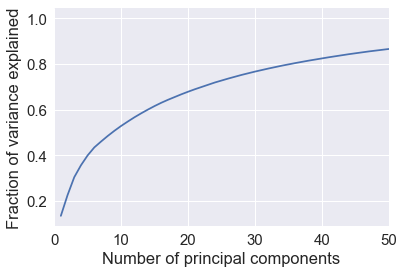

In [44]:
# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [45]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels


new_models = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
new_model_labels= df.index.isin(new_models)

<Figure size 432x288 with 0 Axes>

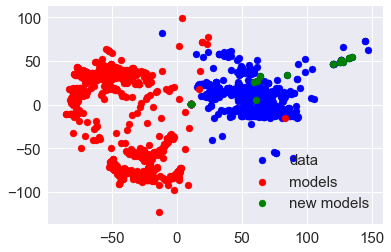

In [46]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='green',cmap='rainbow',label='new models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
# I don't love the isomap fit

<Figure size 432x288 with 0 Axes>

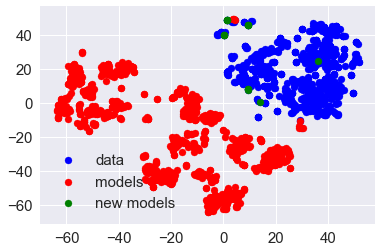

In [47]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=30)
tsne.fit(df.values)
x = tsne.embedding_.T
#np.shape(x)
#print(experiment_idx)
# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels],c='green',cmap='rainbow',label='new models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")


* We can examine the dimension that contributes the most to cluster seperation  by looking at variance explained.


In [48]:
#df_data = pd.read_csv(...)
#df_models = pd.read_csv(...)
from sklearn.ensemble import RandomForestClassifier

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat((df_data, df_models))
#target = np.array([0]*df_models.shape[0] + [1]*df_data.shape[1])
target = np.array(df.index.isin(experiment_idx))

print(np.shape(df_combined))
print(np.shape(target))

rfc = RandomForestClassifier()
rfc.fit(df_combined.values, target)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
importances.sort_values(ascending=False)
#rfc.feature_importances_

(1667, 466)
(1667,)


time_3.0x                              0.200751
AP_begin_voltage_3.0x                  0.176040
InputResistanceTest_1.5x               0.109717
ohmic_input_resistance_vb_ssse_3.0x    0.098552
is_not_stuck_1.5x                      0.093884
AP2_begin_voltage_3.0x                 0.083187
AP1_begin_voltage_3.0x                 0.075115
latency_3.0x                           0.070767
steady_state_hyper_3.0x                0.027289
AP1DelayMeanTest_3.0x                  0.012098
sag_ratio1_3.0x                        0.005537
AP1AHPDepthTest_3.0x                   0.005280
fast_trough_index_1.5x                 0.004258
AP_end_indices_3.0x                    0.004172
AccommodationRateToSSTest_3.0x         0.003983
sag_amplitude_3.0x                     0.003776
depolarized_base_3.0x                  0.003402
fast_trough_t_3.0x                     0.003209
trough_t_3.0x                          0.002641
AHP1_depth_from_peak_3.0x              0.002483
downstroke_3.0x                        0

In [49]:
#np.shape(x)
#x[0,:]
#X[1,:]

In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2,figsize=(8,12),dpi=300)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

CPU times: user 35 s, sys: 5.29 s, total: 40.3 s
Wall time: 41 s
CPU times: user 39.1 s, sys: 5.85 s, total: 45 s
Wall time: 46.1 s
CPU times: user 44.1 s, sys: 5.93 s, total: 50 s
Wall time: 51.8 s


### Repeat above with just experimental data

In [ ]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df

In [ ]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);

In [ ]:
model_no_trans_df.head()

In [ ]:
model_df.head()

In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2,figsize=(8,12))
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

In [ ]:
try:
    os.mkdir('data')
except:
    pass
filename = os.path.join(path2data,'new_cortical_ephys.csv')

model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)